# Creating and manipulating Qbits

We should show how to:
- Create Qbits
- How Qbits can be added
- Rotate
- Center
- Translate

In [1]:
import qse
import numpy as np

## 1. Create Qbits.

A Qbits object can represent : 

- An isolated molecule.
- A repeated structure. 

Let's see examples creating qbits objects for different molecules and crystals in to get a better understanding of its behaviour.


### 1.1. Create Qbits object for $H_{2}O$ molecule.

The first way of creating a molecule or a crystal is by specifying the positions of their qubits in the cartesian coordinate system. With the labels parameter we are assigning a label to each atom. 


In [2]:
h_1_coordinates = np.array([[0.76, 0, 0.58]])
h_2_coordinates = np.array([[-0.76, 0, 0.58]])
o_coordinates = np.array([[0, 0, 0]])
h2o_positions = np.concatenate(
    (
    h_1_coordinates,
    h_2_coordinates,
    o_coordinates
    ),
    axis = 0
)

labels = ['H', 'H', 'O']

h2o = qse.Qbits(
    positions = h2o_positions,
    labels = labels
)



### 1.2. Create Qbits object for $CsCl$.

We can also create a qbit by inputting the unit cell coordinates. For the $CsCl$ the cell is cubic. The scaled positions are the position of the atoms, given in units of the unit cell. 


In [3]:
cell= np.array([
    [4.994, 0, 0], [0, 4.994, 0], [0, 0, 4.994]
    ]
)
scaled_positions = np.array([
    [0.0, 0.0, 0.0], [0.5, 0.5, 0.5]
    ]
)
labels = ['Cs', 'Cl']

cscl = qse.Qbits(
    cell = cell,
    scaled_positions = scaled_positions
)
cscl_positions = cscl.get_positions()


### 1.3. Create Qbits object for $Bi_{2}O_{3}$. 

We can use the lattice vectors $a_1$, $a_2$, $a_3$ and the angles  $\alpha\angle a_2a_3$ ,  $\beta\angle a_1a_3$ , $\gamma\angle a_1a_2$, to define our cell instead of its coordinates as we did before. For $Bi_{2}O_{3}$ we have that: 

$\alpha = \gamma = 90°, \beta = 112.48$, $a_1 = 5.87A$, $a_2 = 8.12A$, $a_3 = 7.45A$






In [4]:
a1 = 5.87
a2 = 8.12
a3 = 7.45
alpha = 90.00 
beta = 112.48
gamma = 90.00
cell = [a1,a2,a3, alpha,beta, gamma]
bi_1 = [0.46, 0.54, 0.22]
bi_2 = [0.98, 0.69, 0.63]
o_1 = [0.23, 0.53, 0.49]
o_2 = [0.26, 0.55, 0.88]
o_3 = [0.72, 0.70, 0.79]
mn = [0.33, 0.66, 0.25]
scaled_positions = np.array([bi_1, bi_2, o_1, o_2, o_3])
bi2o3 = qse.Qbits(cell=cell, scaled_positions=scaled_positions)
bi2o3_positions = bi2o3.get_positions()


### 1.4. Create Qbits object out of single Qbit objects.

We can use the _extend()_ Qbits function to create a Qbits object out of single Qbit objects. An example for the $H_2O$ molecule is shown below. 



In [5]:
h_1_coordinates = np.array([0.76, 0, 0.58])
h_2_coordinates = np.array([-0.76, 0, 0.58])
o_coordinates = np.array([0, 0, 0])
h_1_qbit = qse.Qbit(position = h_1_coordinates)
h_2_qbit = qse.Qbit(position = h_2_coordinates)
o_qbit = qse.Qbit(position = o_coordinates)
h2o = qse.Qbits()
h2o.extend(h_1_qbit)
h2o.extend(h_2_qbit)
h2o.extend(o_qbit)

## 2. Qbits object methods.

### 2.1. Translate the qbits positions. 

Method that allow to perform a translation on the qbits positions. A single float or a np array can be passed to the function.

In [6]:
print('h2O Positions before translation: ','\n', h2o.positions)
h2o.translate(np.array([
    [1.0, 0.0, 0.0],
    [0.0, 4.0, 2.0],
    [0.0, 0.0, 0.0]
]))
print('h2O Positions after translation: ','\n', h2o.positions)
h2o.set_positions(h2o_positions)

h2O Positions before translation:  
 [[ 0.76  0.    0.58]
 [-0.76  0.    0.58]
 [ 0.    0.    0.  ]]
h2O Positions after translation:  
 [[ 1.76  0.    0.58]
 [-0.76  4.    2.58]
 [ 0.    0.    0.  ]]


crank = 0, prank = 2
rcut is 20


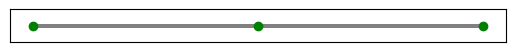

In [34]:
h2o.draw(radius=20)

crank = 3, prank = 1
rcut is 20


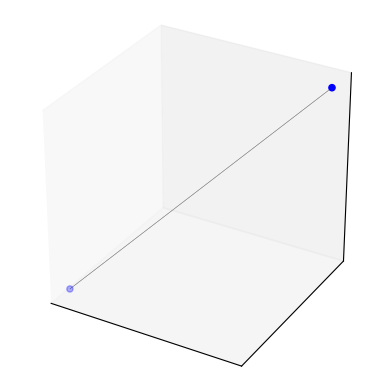

In [37]:
cscl.repeat(rep=5)
cscl.draw(radius=20)

crank = 3, prank = 3
rcut is 12


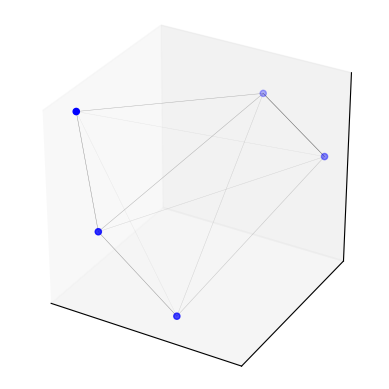

In [33]:
bi2o3.draw(radius=12)

In [30]:
positions = h2o.positions.copy()
print('Positions : ','\n', positions, '\n\n')
x, y, z = positions.T 
rij = h2o.get_all_distances()
print('rij : ','\n', rij, '\n\n')
ib = np.logical_not(np.eye(h2o.nqbits, dtype=bool))
print('ib : ', '\n', ib, '\n\n')
rcut = rij[ib].min()
print('rcut : ', '\n', rcut, '\n\n')
nns = rij <= rcut 
np.fill_diagonal(nns, False)
print('nns : ', '\n', nns, '\n')
ii, jj = np.where(nns)
print('ii : ', '\n', ii, '\n')
print('jj : ', '\n', jj, '\n')
X, Y, Z = positions[ii].T
U, V, W = (positions[jj] - positions[ii]).T
C = rij[nns]
C = C / C.min()
print('X : ', '\n', X, '\n')
print('Y : ', '\n', Y, '\n')
print('Z : ', '\n', Z, '\n')
print('U : ', '\n', U, '\n')
print('V : ', '\n', V, '\n')
print('W : ', '\n', W, '\n')
print('C : ', '\n', C, '\n')


Positions :  
 [[ 0.76  0.    0.58]
 [-0.76  0.    0.58]
 [ 0.    0.    0.  ]] 


rij :  
 [[0.         1.52       0.95603347]
 [1.52       0.         0.95603347]
 [0.95603347 0.95603347 0.        ]] 


ib :  
 [[False  True  True]
 [ True False  True]
 [ True  True False]] 


rcut :  
 0.9560334722173696 


nns :  
 [[False False  True]
 [False False  True]
 [ True  True False]] 

ii :  
 [0 1 2 2] 

jj :  
 [2 2 0 1] 

X :  
 [ 0.76 -0.76  0.    0.  ] 

Y :  
 [0. 0. 0. 0.] 

Z :  
 [0.58 0.58 0.   0.  ] 

U :  
 [-0.76  0.76  0.76 -0.76] 

V :  
 [0. 0. 0. 0.] 

W :  
 [-0.58 -0.58  0.58  0.58] 

C :  
 [1. 1. 1. 1.] 



In [ ]:
a = np.array([
    False, True
])

### 2.2. Center qbits in unit cell. 

Centers the qubits in the unit cell. Using the parameters _vacuum_ and _axis_, we can specify the amount of vacuum left when centering and the axes to act on. 

In [ ]:
print('CsCl Positions before centering: ','\n', cscl.positions)
cscl.center_in_unit_cell(vacuum = 10, axis = (0,2))
print('CsCl Positions after centering: ','\n', cscl.positions)
cscl.set_positions(cscl_positions)

CsCl Positions before centering:  
 [[0.    0.    0.   ]
 [2.497 2.497 2.497]]
CsCl Positions after centering:  
 [[10.     0.    10.   ]
 [12.497  2.497 12.497]]


### 2.3. Get and set centroid.

Allows to get the centroid of the positions of the atoms. When setting a new centroid, the positions of the atoms will be modified accordingly. The _scaled_ parameter allows us to decide wether we are setting the centroid in scaled positions or not. 

In [ ]:
print('Bi2O3 centroid: ', '\n', bi2o3.get_centroid())
print('Bi2O3 positions before setting new centroid: ', '\n', bi2o3.get_positions())
bi2o3.set_centroid(
    ([
        [0.0, 0.0, 0.0]
    ]),
    scaled= True
)
print('Bi2O3 positions after changing centroid: ', '\n', bi2o3.get_positions())
bi2o3.set_positions(bi2o3_positions)

Bi2O3 centroid:  
 [1.39624954 4.88824    4.14410616]
Bi2O3 positions before setting new centroid:  
 [[ 2.07351046  4.3848      1.5144574 ]
 [ 3.95798905  5.6028      4.33685529]
 [-0.04570852  4.3036      3.37310967]
 [-0.98055815  4.466       6.05782961]
 [ 1.97601484  5.684       5.43827885]]
Bi2O3 positions after changing centroid:  
 [[ 0.67726093 -0.50344    -2.62964876]
 [ 2.56173951  0.71456     0.19274912]
 [-1.44195805 -0.58464    -0.7709965 ]
 [-2.37680769 -0.42224     1.91372344]
 [ 0.5797653   0.79576     1.29417269]]
